In [1]:
from data_processing_functions import *
from time import time


In [9]:
validation_measures = ["cost","f1","precision","recall","accuracy","tp","tn","fp","fn"]
# csv_path = "/home/jens/masterData/AlgorithmTuner/RANDGEICS/2021-25-02-19-46-25-data.csv"
csv_paths = ["/home/jens/masterData/AlgorithmTuner/RANDGEUICS/2021-26-02-09-59-40-data.csv"]
dfs = []
for path in csv_paths:
     dfs.append(read_csv(csv_path, usecols = ["algName","objName","geName"]+validation_measures, dtype = {"algName":"category","objName":"category","geName":"category"}))

df = pd.read_csv(csv_path, usecols = ["algName","objName","geName"]+validation_measures, dtype = {"algName":"category","objName":"category","geName":"category"})
df = pd.concat(dfs).groupby(["algName","objName"]).mean().reset_index()

,algName,objName,tp,tn,fp,fn,precision,recall,accuracy,f1,cost
0,BL,AngleTubes,20.000000,5.500000,7.687500,1.812500,0.721580,0.610863,0.728906,0.767266,0.761886
1,BL,Conrods,3.166667,7.000000,7.766667,0.066667,0.302421,0.204705,0.558250,0.429387,0.850369
2,BL,Ears,1.468750,5.093750,2.031250,0.750000,0.457366,0.251823,0.716597,0.508656,0.883345
3,BL,Gameboys,2.052632,5.578947,0.947368,1.473684,0.706140,0.179874,0.768500,0.624220,0.865465
4,GA,AngleTubes,18.062500,4.562500,8.625000,3.750000,0.674903,0.503507,0.647391,0.702692,0.639523
5,GA,Conrods,2.400000,6.800000,7.966667,0.833333,0.242881,0.157856,0.505577,0.343706,0.708838
6,GA,Ears,1.750000,4.562500,2.562500,0.468750,0.417634,0.296974,0.666026,0.508539,0.795041
7,GA,Gameboys,3.210526,3.421053,3.105263,0.315789,0.515267,0.280985,0.640835,0.631370,0.714351
8,GASP,AngleTubes,18.187500,5.062500,8.125000,3.625000,0.684969,0.566306,0.665394,0.715734,0.641501
9,GASP,Conrods,2.433333,7.000000,7.766667,0.800000,0.248632,0.159371,0.517713,0.351679,0.709151


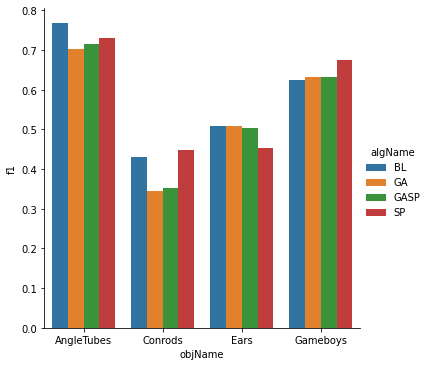

In [10]:
sns.catplot(x="objName",y="f1",hue="algName",data=df,kind="bar")

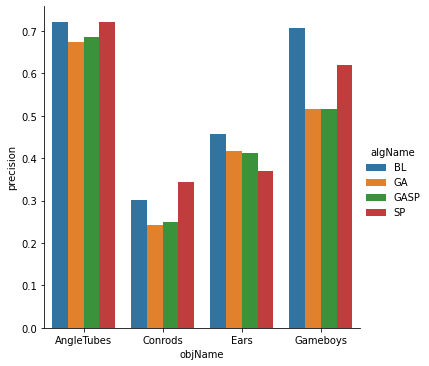

In [11]:
sns.catplot(x="objName",y="precision",hue="algName",data=df,kind="bar")

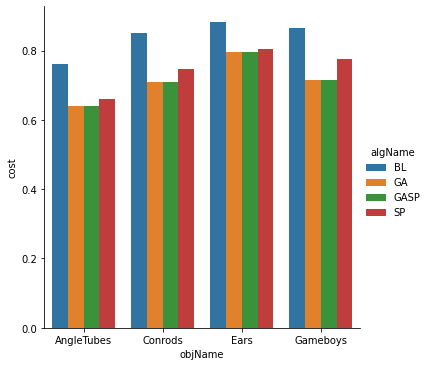

In [12]:
sns.catplot(x="objName",y="recall",hue="algName",data=df,kind="bar")

In [22]:
def parameter_tuning_validation_barplot(df,tuning_measure,validation_measures,figsize=(20,5)):
    max_idx = df.groupby(["algName","objName"])[tuning_measure].idxmax().to_numpy()
    print(df.loc[max_idx,:])
    fig, axes = plt.subplots(1,len(validation_measures)+1,figsize=(20,5),tight_layout=True)

    for key,ax in zip(validation_measures+[tuning_measure],axes):
        sns.barplot(x="objName", y=key, hue="algName", data=df.loc[max_idx,:],ax=ax)
    return fig,axes
fig,axes = parameter_tuning_validation_barplot(df,tuning_measure,validation_measures,figsize=(20,5))


NameError: name 'tuning_measure' is not defined

In [23]:
print_tuned_parameters(df,tuning_measure,tested_parameter)



In [ ]:
data_info_path_old = "/home/jens/masterData/AlgorithmTuner/DataSetComparison/Old/2021-16-02-15-44-53-data_info.csv"
data_info_path_new = "/home/jens/masterData/AlgorithmTuner/DataSetComparison/New/2021-16-02-15-34-48-data_info.csv"
data_info_old = pd.read_csv(data_info_path_old)
data_info_new = pd.read_csv(data_info_path_new)
df_old = pd.read_csv(data_info_old["data_path"].item())
df_new = pd.read_csv(data_info_new["data_path"].item())

keys = ["precision","recall","accuracy","cost","t_dist_avr","r_dist_avr"]
fig, axes = plt.subplots(len(keys),2,figsize=(20,20),tight_layout=True,sharey='row')
for ax in axes[:,0]:
    ax.set_title("Old")
for ax in axes[:,1]:
    ax.set_title("New")

for i,key in enumerate(keys):
    object_mean_barplot(df_old,key,axes[i,0])
    object_mean_barplot(df_new,key,axes[i,1])
plt.show()

In [ ]:
data_info_path_bl = "/home/jens/masterData/AlgorithmTuner/ScoreThresholdTuning/BL/2021-17-02-13-06-07-data_info.csv"
data_info_path_sp = "/home/jens/masterData/AlgorithmTuner/ScoreThresholdTuning/SP/2021-17-02-13-08-16-data_info.csv"

data_info_bl = pd.read_csv(data_info_path_bl)
data_info_sp = pd.read_csv(data_info_path_sp)

bl_variable_key = "BL/Score Threshold"
sp_variable_key = "SP/Score Threshold"
groupby = ["objName","algName"]

import time

start = time.time()
bl_df = series_mean(data_info_bl,bl_variable_key,groupby=groupby)
bl_gb = bl_df.groupby(groupby)
bl_gbs = bl_gb.groups

sp_df = series_mean(data_info_sp,sp_variable_key,groupby=groupby)
sp_gb = sp_df.groupby(groupby)
sp_gbs = sp_gb.groups

end = time.time()
print(end - start)

fig, axes = plt.subplots(len(bl_gb),2,figsize=(20,20),tight_layout=True)

def precision_recall(data_info,variable_key,grouped_data,groups,axes):
    for g,ax in zip(groups,axes):
        data = grouped_data.get_group(g)
        ax.plot(data[variable_key],data["precision"],"C0")
        ax.plot(data[variable_key],data["recall"],"C1")
        ax.plot(data[variable_key],data["accuracy"],"C2")
        accMaxAt = data[variable_key][np.argmax(data["accuracy"])]
        ax.axvline(accMaxAt,color="C2",linestyle='--')
        ax.plot(data[variable_key],data["f1"],"C3")
        f1MaxAt = data[variable_key][np.argmax(data["f1"])]
        ax.axvline(f1MaxAt,color="C3",linestyle='--')
        ax.legend(["precision","recall","accuracy","accuracy max","f1","f1 max"])
        print(str(g," accuracy max: ",accMaxAt,", f1 max: ",f1MaxAt)
 
        
        ax.set_title(str(g))

        ax.set_xlabel(variable_key)

precision_recall(data_info_bl,bl_variable_key,bl_gb,bl_gbs,axes[:,0])
precision_recall(data_info_sp,sp_variable_key,sp_gb,sp_gbs,axes[:,1])

for ax_l,ax_r in axes:
    min_y = min(ax_l.get_ylim()[0],ax_r.get_ylim()[0])
    max_y = max(ax_l.get_ylim()[1],ax_r.get_ylim()[1])
    ax_l.set_ylim((min_y,max_y))
    ax_r.set_ylim((min_y,max_y))

In [ ]:
data_info_path = "/home/jens/masterData/AlgorithmTuner/SigmoidCenter/2021-12-02-09-50-24-data_info.csv"
data_info = pd.read_csv(data_info_path)

variable_key = "GeneticEvaluatorOC/Sigmoid center"
# groupby = ["algName","objName"]
groupby = ["algName"]


df = series_mean(data_info,variable_key,groupby=groupby)
gb = df.groupby(groupby)
gbs = gb.groups
fig, axes = plt.subplots(len(gb),1,figsize=(20,20),tight_layout=True)


def precision_recall(data_info,variable_key,grouped_data,groups,axes):
    for g,ax in zip(groups,axes):
        data = grouped_data.get_group(g)
        ax.plot(data[variable_key],data["precision"],"C0")
        ax.set_ylabel("precision",color="C0")
        ax2 = ax.twinx()
        ax2.plot(data[variable_key],data["recall"],"C1")
        ax2.set_ylabel("recall",color="C1")
        ax.set_title(str(g))
        ax.set_xlabel(variable_key)

precision_recall(data_info,variable_key,gb,gbs,axes)

plt.show()